En esta programa se ilustra cómo usando una lista de datos se puede obtener una relación de potencia a partir de datos experimentales. Primero se grafican para luego obtener la ecuación empírica a partir de ajustes de regresión lineal. Para ello se usa la transformación de datos mediante la función logaritmo.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#matplotlib inline
import math
import cmath

Definición de los datos

In [3]:
lon=[10, 20, 30, 40, 50, 60]
precio=[40, 160, 360, 640, 1000, 1440]

grafica de los datos

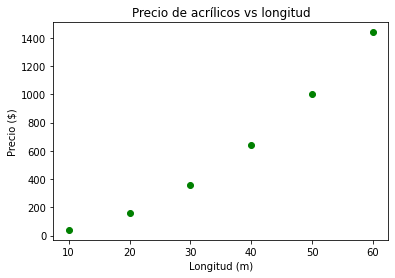

In [4]:
plt.figure() 
plt.plot(lon,precio,'go',markersize=6)
plt.xlabel('Longitud (m)')
plt.ylabel('Precio ($)')
plt.title('Precio de acrílicos vs longitud')
plt.savefig('acrili.png',dpi=300) # se salva la figura en eps con 300 dpi

transformación de los datos en el eje Y

In [5]:
precioln=np.log(precio)

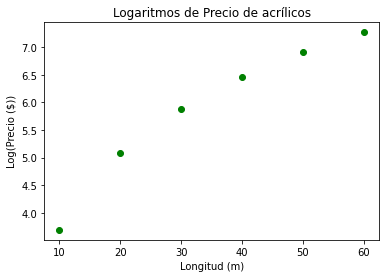

In [6]:
plt.figure() 
plt.plot(lon,precioln,'go',markersize=6)
plt.xlabel('Longitud (m)')
plt.ylabel('Log(Precio ($))')
plt.title('Logaritmos de Precio de acrílicos')
plt.savefig('acrililnY.png',dpi=300) # se salva la figura en eps con 300 dpi

transformación de los datos en el eje X

In [7]:
lonln=np.log(lon)

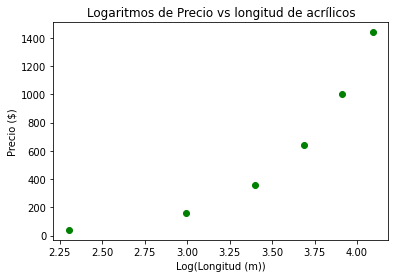

In [8]:
plt.figure() 
plt.plot(lonln,precio,'go',markersize=6)
plt.xlabel('Log(Longitud (m))')
plt.ylabel('Precio ($)')
plt.title('Logaritmos de Precio vs longitud de acrílicos')
plt.savefig('acrililn.png',dpi=300) # se salva la figura en eps con 300 dpi

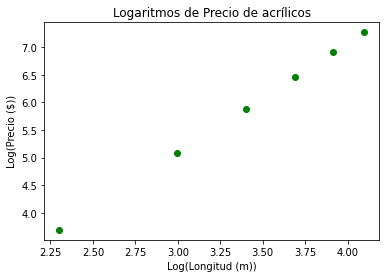

In [9]:
plt.figure() 
plt.plot(lonln,precioln,'go',markersize=6)
plt.xlabel('Log(Longitud (m))')
plt.ylabel('Log(Precio ($))')
plt.title('Logaritmos de Precio de acrílicos')
plt.savefig('acrililnln.png',dpi=300) # se salva la figura en eps con 300 dpi

La inspección visual sugiere una relación lineal. Definiremos una función regrelineal para obtener el ajuste de regesión lineal de los datos transformados en X y Y

In [10]:
# definimos la funcion regrelineal
# en ella hemos codificado las formulas de regresion lienal por minimos cuadrados
def regrelineal(x, y):
    # numero de parejas de datos
    n = np.size(x)
    ny= np.size(y)
    if n != ny: 
       return('no son parejas de datos')
 
    # promedio de los arreglos x y y
    p_x = np.mean(x)
    p_y = np.mean(y)
 
    # calculando la desviacion cruzada y desviacion en x
    SS_xy = np.sum(y*x) - n*p_y*p_x
    SS_xx = np.sum(x*x) - n*p_x*p_x
 
    # calculo de m y b
    p1 = SS_xy / SS_xx
    p0 = p_y - p1*p_x

    # calculo de R cuadrada
    error = y - (p1*x + p0)
    se = np.sum(error**2)
    SSt = np.sum((y - p_y)**2)
    p2 = 1- (se/SSt)
 # el resultado p0 es la ordenada al origen p1 es la pendiente y p2 es R cuadrada
    return (p1, p0, p2)

In [11]:
# ajuste lineal a los datos transformados 
m1, b0, R2 = regrelineal(lonln, precioln)
#valores de y con el ajuste
logP= m1 * lonln + b0

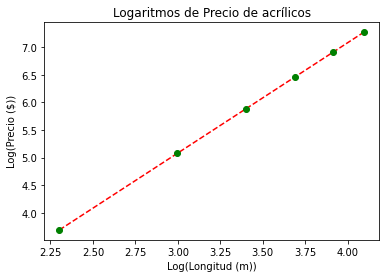

In [12]:
plt.figure()
plt.plot(lonln,logP,'r--', lonln, precioln,'go',markersize=6)
plt.xlabel('Log(Longitud (m))')
plt.ylabel('Log(Precio ($))')
plt.title('Logaritmos de Precio de acrílicos')
plt.savefig('acrililnajus.png',dpi=300) # se salva la figura en eps con 300 dpi

In [13]:
precioajuste=np.exp(logP)

Resultado final

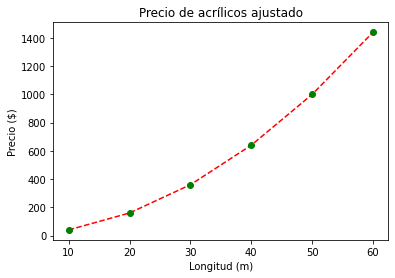

In [14]:
plt.figure()
plt.plot(lon,precioajuste,'r--', lon, precio,'go',markersize=6)
plt.xlabel('Longitud (m)')
plt.ylabel('Precio ($)')
plt.title('Precio de acrílicos ajustado')
plt.savefig('acriliajuste.png',dpi=300) # se salva la figura en eps con 300 dpi

Obtención de los parámetros de ajuste

In [18]:
print('La potencia es',m1,'la constante multiplicativa o valor inicial es ',np.exp(b0))

La potencia es 2.000000000000013 la constante multiplicativa o valor inicial es  0.3999999999999822


In [16]:
print('La bondad del ajuste se observa en el valor',R2,', mientrás más cercano a 1 (-1) es más adecuado el ajuste.')

La bondad del ajuste se observa en el valor 1.0 , mientrás más cercano a 1 (-1) es más adecuado el ajuste.


In [17]:
print('La ordenada al origen es ',b0)

La ordenada al origen es  -0.9162907318741995
